In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,GlobalAveragePooling2D,Dropout
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [3]:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\PRO\\python\\Anaconda_work\\TCR\\Brain-Tumor'

In [4]:
dataset = os.getcwd()+"\\dataset"
yes_path = dataset+"\\yes"
no_path = dataset+"\\no"

In [5]:
os.listdir(yes_path)

['Y1.jpg',
 'Y10.jpg',
 'Y100.JPG',
 'Y101.jpg',
 'Y102.jpg',
 'Y103.jpg',
 'Y104.jpg',
 'Y105.jpg',
 'Y106.jpg',
 'Y107.jpg',
 'Y108.jpg',
 'Y109.JPG',
 'Y11.jpg',
 'Y111.JPG',
 'Y112.JPG',
 'Y113.JPG',
 'Y114.JPG',
 'Y115.JPG',
 'Y116.JPG',
 'Y117.JPG',
 'Y12.jpg',
 'Y120.JPG',
 'Y13.jpg',
 'Y14.jpg',
 'Y146.JPG',
 'Y147.JPG',
 'Y148.JPG',
 'Y15.jpg',
 'Y153.jpg',
 'Y154.jpg',
 'Y155.JPG',
 'Y156.JPG',
 'Y157.JPG',
 'Y158.JPG',
 'Y159.JPG',
 'Y16.JPG',
 'Y160.JPG',
 'Y161.JPG',
 'Y162.jpg',
 'Y163.JPG',
 'Y164.JPG',
 'Y165.JPG',
 'Y166.JPG',
 'Y167.JPG',
 'Y168.jpg',
 'Y169.jpg',
 'Y17.jpg',
 'Y170.JPG',
 'Y18.JPG',
 'Y180.jpg',
 'Y181.jpg',
 'Y182.JPG',
 'Y183.jpg',
 'Y184.JPG',
 'Y185.jpg',
 'Y186.jpg',
 'Y187.jpg',
 'Y188.jpg',
 'Y19.JPG',
 'Y192.JPG',
 'Y193.JPG',
 'Y194.jpg',
 'Y195.JPG',
 'Y2.jpg',
 'Y20.jpg',
 'Y21.jpg',
 'Y22.jpg',
 'Y23.JPG',
 'Y24.jpg',
 'Y242.JPG',
 'Y243.JPG',
 'Y244.JPG',
 'Y245.jpg',
 'Y246.JPG',
 'Y247.JPG',
 'Y248.JPG',
 'Y249.JPG',
 'Y25.jpg',
 'Y250

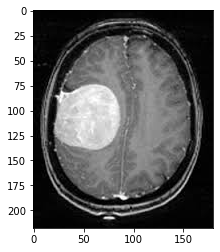

In [6]:
img = cv2.imread(yes_path+r"\\y1.jpg")
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
img.shape

(218, 180, 3)

In [8]:
filepath = []
labels = []
def details(l):
    for i in l:
        for j in os.listdir(i):
            x = os.path.join(i,j)
            filepath.append(x)
            labels.append(os.path.basename(i))
details([yes_path,no_path])

In [9]:
filepath[123]

'C:\\Users\\Admin\\Desktop\\PRO\\python\\Anaconda_work\\TCR\\Brain-Tumor\\dataset\\yes\\Y61.jpg'

In [10]:
labels[123]

'yes'

In [11]:
zip_data = list(zip(filepath,labels))
df = pd.DataFrame(data=zip_data,columns=["Filepath","Labels"])

In [12]:
df.head()

,Filepath,Labels
0,C:\Users\Admin\Desktop\PRO\python\Anaconda_wor...,yes
1,C:\Users\Admin\Desktop\PRO\python\Anaconda_wor...,yes
2,C:\Users\Admin\Desktop\PRO\python\Anaconda_wor...,yes
3,C:\Users\Admin\Desktop\PRO\python\Anaconda_wor...,yes
4,C:\Users\Admin\Desktop\PRO\python\Anaconda_wor...,yes


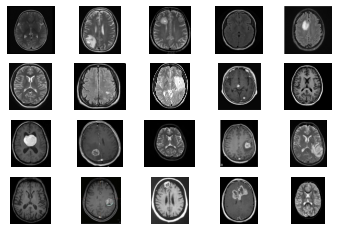

In [13]:
for i in range(20):
    vals = np.random.randint(i,len(df))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(df.Filepath[vals]))
    plt.axis("off")
plt.show()

In [14]:
Train,test = train_test_split(df,test_size=0.2,random_state=42)
train,valid = train_test_split(Train,train_size=0.8,random_state=42)

In [15]:
train.shape,valid.shape,test.shape

((161, 2), (41, 2), (51, 2))

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,height_shift_range=0.2,width_shift_range=0.2,
                 shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_gen = train_datagen.flow_from_dataframe(dataframe=train,x_col="Filepath",y_col="Labels",batch_size=16,
                                              target_size=(200,200),shuffle=True,class_mode="binary")
valid_gen = train_datagen.flow_from_dataframe(dataframe=valid,x_col="Filepath",y_col="Labels",batch_size=16,
                                              target_size=(200,200),shuffle=True,class_mode="binary")
test_gen = test_datagen.flow_from_dataframe(dataframe=test,x_col="Filepath",y_col="Labels",batch_size=16,
                                              target_size=(200,200),shuffle=True,class_mode="binary")

Found 161 validated image filenames belonging to 2 classes.
Found 41 validated image filenames belonging to 2 classes.
Found 51 validated image filenames belonging to 2 classes.


In [18]:
train_gen[0][0].shape      # in the first batch as their are only 16 images

(16, 200, 200, 3)

In [19]:
train_gen[1][0].shape

(16, 200, 200, 3)

In [20]:
train_gen[0][0][15].shape     # accessing 16th img of 1 batch

(200, 200, 3)

In [21]:
train_gen[0][0][0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.01960784, 0.        ],
        [0.        , 0.01960784, 0.        ],
        [0.        , 0

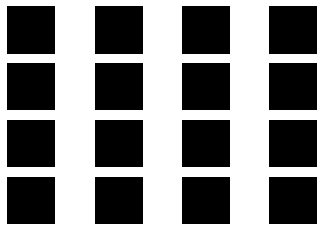

In [22]:
# passing 1 image in the train_gen and seeing diff variations
# since rescaled
for i in range(16):
    val = train_gen[0][0][5]
    vals = val.astype("uint8")
    plt.subplot(4,4,i+1)
    plt.imshow(vals)
    plt.axis("off")
plt.show()

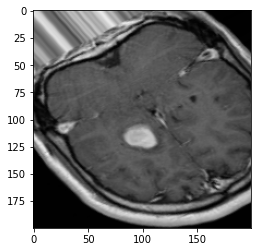

In [23]:
plt.imshow(train_gen[0][0][12])

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
base_model = tf.keras.applications.InceptionResNetV2(weights="imagenet",input_shape=(200,200,3),include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [26]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")
model.fit(train_gen,validation_data=valid_gen,epochs=10,verbose=2)

Epoch 1/10
11/11 - 172s - loss: 0.6818 - accuracy: 0.6832 - val_loss: 19.5496 - val_accuracy: 0.5366 - 172s/epoch - 16s/step
Epoch 2/10
11/11 - 141s - loss: 0.4524 - accuracy: 0.8199 - val_loss: 18.8885 - val_accuracy: 0.5366 - 141s/epoch - 13s/step
Epoch 3/10
11/11 - 143s - loss: 0.4437 - accuracy: 0.8571 - val_loss: 2.3134 - val_accuracy: 0.5366 - 143s/epoch - 13s/step
Epoch 4/10
11/11 - 142s - loss: 0.2621 - accuracy: 0.8820 - val_loss: 2.3264 - val_accuracy: 0.5366 - 142s/epoch - 13s/step
Epoch 5/10
11/11 - 156s - loss: 0.2866 - accuracy: 0.8758 - val_loss: 5.1727 - val_accuracy: 0.5366 - 156s/epoch - 14s/step
Epoch 6/10
11/11 - 204s - loss: 0.3747 - accuracy: 0.8696 - val_loss: 21.5789 - val_accuracy: 0.5366 - 204s/epoch - 19s/step
Epoch 7/10
11/11 - 147s - loss: 0.4294 - accuracy: 0.7888 - val_loss: 178.4153 - val_accuracy: 0.6829 - 147s/epoch - 13s/step
Epoch 8/10
11/11 - 151s - loss: 0.3132 - accuracy: 0.8696 - val_loss: 7.9908 - val_accuracy: 0.7073 - 151s/epoch - 14s/step
Epo

In [38]:
model.evaluate(test_gen)

4/4 [==============================] - 11s 2s/step - loss: 44.9174 - accuracy: 0.7255


[44.91735076904297, 0.7254902124404907]